In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# data description
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
    
feat_info('mort_acc')

Number of mortgage accounts.


In [3]:
# load the data
df = pd.read_csv('lending_club_loan.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [4]:
"""Dealing with missing data: remove or filling"""

'Dealing with missing data: remove or filling'

In [5]:
# check the amount of data
len(df)

396030

In [6]:
# find the count of missing values for each column
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [7]:
# find the percentage of missing data
100 * df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [8]:
# check features with a high percentage of missing data
# start with emp_title and emp_length
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [9]:
df['emp_title'].nunique()

173105

In [10]:
df['emp_title'].value_counts()

Teacher                        4389
Manager                        4250
Registered Nurse               1856
RN                             1846
Supervisor                     1830
                               ... 
Director of Human resources       1
UnitedHealthGroup                 1
Cabo Flats                        1
Star Beacon                       1
Kindred Northwest                 1
Name: emp_title, Length: 173105, dtype: int64

In [11]:
# emp_title is job title 
# there are too many unique job titles to be converted to a dummy variable
# let's remove the title
df = df.drop('emp_title', axis=1)

In [12]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [13]:
emp_length_order = \
['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

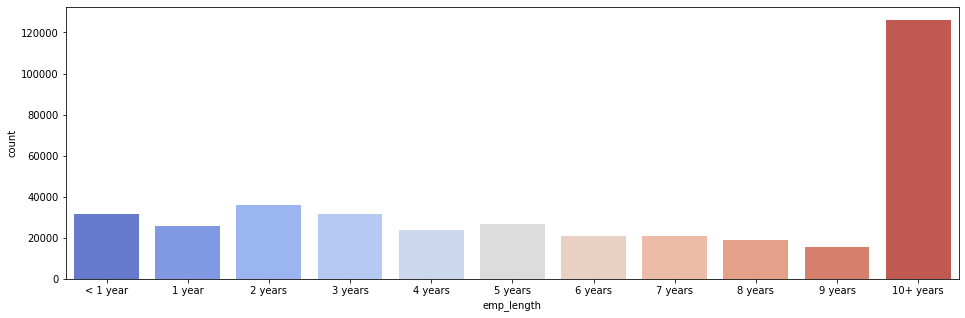

In [14]:
plt.figure(figsize=(16,5))
sns.countplot(data=df, x='emp_length', order=emp_length_order, palette='coolwarm')

<AxesSubplot:xlabel='emp_length', ylabel='count'>

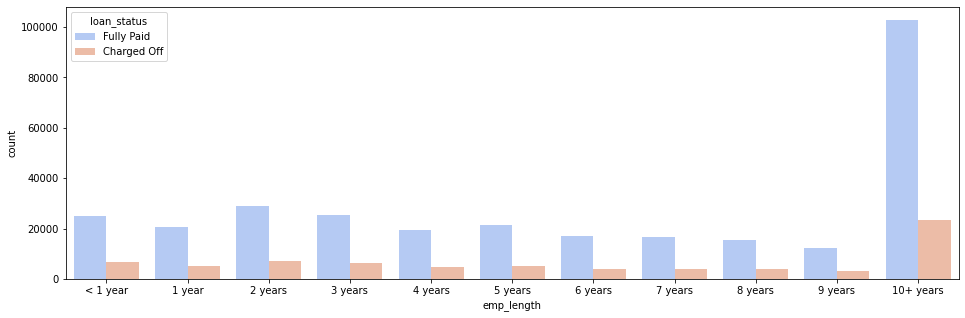

In [15]:
plt.figure(figsize=(16,5))
sns.countplot(data=df, x='emp_length', order=emp_length_order, palette='coolwarm', hue='loan_status')

In [16]:
# Is there a strong relationship bwteen the employment length and being charged off?
# We'd like to find the ratio, or percentage of being charged off for each length group
# charged off
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length')['loan_status'].count()
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [17]:
# fully paid
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length')['loan_status'].count()
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [18]:
ratio_emp_len = emp_co/emp_fp
ratio_emp_len = ratio_emp_len.reset_index().rename(columns={'index': 'emp_len', 'loan_status': 'ratio'})
ratio_emp_len

,emp_length,ratio
0,1 year,0.248649
1,10+ years,0.225770
2,2 years,0.239560
3,3 years,0.242593
4,4 years,0.238213
5,5 years,0.237911
6,6 years,0.233341
7,7 years,0.241887
8,8 years,0.249625
9,9 years,0.250735


<BarContainer object of 11 artists>

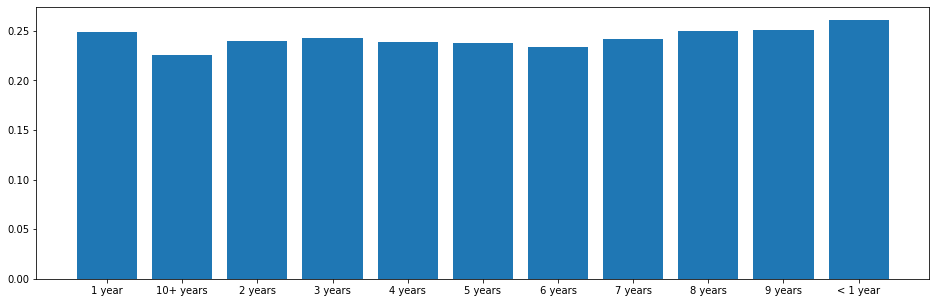

In [19]:
plt.figure(figsize=(16,5))
plt.bar(ratio_emp_len['emp_length'], ratio_emp_len['ratio'])

In [20]:
# Charge off ratio are extremely similar across all employement lengths.
# It'safe to remove the colum
df = df.drop('emp_length', axis=1)

In [21]:
# check on the title
feat_info('title')
feat_info('purpose')

The loan title provided by the borrower
A category provided by the borrower for the loan request. 


In [22]:
df[['title', 'purpose']].head(10)

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


In [23]:
# title and purpose are redudant information, remove the one with missing values
df = df.drop('title', axis=1)

In [24]:
# check on the column with most missing values
feat_info('mort_acc')
df['mort_acc'].value_counts()

Number of mortgage accounts.


0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [25]:
# can we estimate the number of mortgage accounts with some other columns?
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [26]:
# total_acc presents the highest correlation with mort_acc
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [27]:
# we may use the average mort_acc for each total_acc to estimate mort_acc with missing values
mort_acc_by_total_acc = df.groupby('total_acc').mean()['mort_acc']
mort_acc_by_total_acc 

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [28]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return mort_acc_by_total_acc[total_acc]
    else:
        return mort_acc
    
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [29]:
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.001351
address                 0.000000
dtype: float64

In [30]:
# revol_util and pub_rec have missing values less than 0.2% of the total data
# remove the rows with missing valus
df = df.dropna()
# check again
df.isnull().sum().sum()

0

In [31]:
"""Ddealing with categoricaldata"""

'Ddealing with categoricaldata'

In [32]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [33]:
# term feature
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [34]:
# notice that position 0 is ' '
df['term'] = df['term'].str[1:3].astype('int32')
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int32

In [35]:
# grade feature
# from EDA, we know that grade is the higher order group of sub_grade
# this can been seen as redudant 
df = df.drop('grade', axis=1)

In [36]:
len(df[df['sub_grade']=='A1'])

9717

In [37]:
# sub_grade feature: convert to dummy variables
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dummies], axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [38]:
len(df[df.iloc[:,-35:].sum(axis=1)==0])

9717

In [ ]:
# df[df['sub_grade']=='A1'] is represented with all 0 from 'A2' to 'G5' with 9717 entries

In [39]:
# Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] 
# into dummy variables 
# and concatenate them with the original dataframe. 
# Remember to set drop_first=True and to drop the original columns.
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [41]:
# home_ownership feature
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [42]:
# replace NONE and ANY with OTHER then convert to dummy variables
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [46]:
# address feature: extract the zipcode
df['zip_code'] = df['address'].str[-5:]
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

In [48]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [49]:
# there are only 1 zipcode in the dataset: convert to dummy variables
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [52]:
"""Preventing data leakage"""
# issue_d
feat_info('issue_d')

The month which the loan was funded


In [53]:
# Our goal is to predict whether a loan will be charged off or fully paid
# and therefore decide whether to issue the loan
# we wouldn't know the issue_date before making the decision
# therefore issue_d is information from the future
# including issue_d in the model leads to data leakage
# as it's more likely the loan will be paid fully if we decide to issue the loan
df = df.drop('issue_d', axis=1)

In [54]:
"""Dealing with time data"""
# earliest_cr_line feature
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [56]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [60]:
# extract the month and year of the earliest_cr_line into two columns
df['earliest_cr_line_month'] = pd.to_datetime(df['earliest_cr_line']).dt.month
df['earliest_cr_line_year'] = pd.to_datetime(df['earliest_cr_line']).dt.year
df[['earliest_cr_line', 'earliest_cr_line_month', 'earliest_cr_line_year']]

,earliest_cr_line,earliest_cr_line_month,earliest_cr_line_year
0,Jun-1990,6,1990
1,Jul-2004,7,2004
2,Aug-2007,8,2007
3,Sep-2006,9,2006
4,Mar-1999,3,1999
...,...,...,...
396025,Nov-2004,11,2004
396026,Feb-2006,2,2006
396027,Mar-1997,3,1997
396028,Nov-1990,11,1990


In [61]:
df = df.drop('earliest_cr_line', axis=1)

In [62]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,0,1,0,0,0,0,0,0,6,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,0,0,0,0,0,0,0,0,7,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,0,0,0,0,0,0,0,0,8,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,9,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,1,0,0,0,0,0,0,0,3,1999


In [63]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '

In [65]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

In [66]:
# the only categorical variabl left is the prediction target loan_status
# convert this to a binary variable and drop it
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})
df[['loan_status', 'loan_repaid']].head(10)

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
5,Fully Paid,1
6,Fully Paid,1
7,Fully Paid,1
8,Fully Paid,1
9,Fully Paid,1


In [71]:
df = df.drop('loan_status', axis=1)
df.select_dtypes('object').columns

Index([], dtype='object')

In [72]:
# no more categorical variables left

In [74]:
df.isnull().sum().sum()

0

In [75]:
# no missing values

In [81]:
# save the cleaned dataset
df.to_csv('lending_club_loan_clean.csv')

In [ ]:
# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
X_train_sample = X_train.sample(400)
shap_values  = explainer.shap_values(X_train_sample)
# shap.summary_plot(shap_values, X_train_sample)
shap_values

In [80]:
len(df)

395219